In [1]:
import numpy as np

import sys
sys.path.append(f'../src')
from importlib import reload 
import numpy as np
import torch
from torch.optim import Adam
import gym
import time

import sac_tri
import sac_tri_envs
import core_tri

reload(sac_tri);
reload(sac_tri_envs);
reload(core_tri);

## Train the two-qubit Maxwell's demon

In [6]:
a_val = 1.

env_params = {
    "e0": 5.,
    "g": 1.,                      
    "b": 1.,
    "gamma": 1.,
    "min_u": -0.8,
    "max_u": 0.8,
    "dt": 0.15,   
    "a": a_val,
    "pow_coeff": 1.,
    "diss_coeff": 1.,
    "counter_rot": False,
    "mesolver_nsteps": 30000 
}   

training_hyperparams = {
    "BATCH_SIZE": 256,              #batch size
    "LR": 0.001,                    #learning rate
    "ALPHA_LR": 0.003,              #learning rate just for the alpha params
    "H_D_START": np.log(3.),        #the exploration coeff
    "H_D_END": 0.01,                #the exploration coeff
    "H_D_DECAY": 30000,             #the exploration coeff, in "units" of steps
    "H_C_START": 0.80,               #the exploration coeff. IF YOU GET NAN ERROR, DECREASE IT BY 0.01 
    "H_C_END": -3.,                 #with 2 actions, just double the H_C
    "H_C_DECAY": 60000,             #the exploration coeff, in "units" of steps
    "REPLAY_MEMORY_SIZE": 80000,    #buffer size
    "POLYAK": 0.995,                #polyak coefficient
    "LOG_STEPS": 1000,              #save logs and display training every number of steps
    "GAMMA": 0.998,                 #RL discount factor
    "HIDDEN_SIZES": (256,128),      #size of hidden layers 
    "SAVE_STATE_STEPS": 160000,     #saves complete state of trainig every number of steps
    "INITIAL_RANDOM_STEPS": 5000,   #number of initial uniformly random steps
    "UPDATE_AFTER": 1000,           #start minimizing loss function after initial steps
    "UPDATE_EVERY": 50,             #performs this many updates every this many steps
    "USE_CUDA": False,              #use cuda for computation
    "MIN_COV_EIGEN": 1.e-8,
    "DONT_SAVE_MEMORY": True
}
log_info = {
    "log_running_reward": True,     #log running reward 
    "log_running_loss": True,       #log running loss
    "log_actions": True,            #log chosen actions
    "extra_str": f"_a={a_val}" #extra string to append to training folder
}

train = sac_tri.SacTrain()
train.initialize_new_train(sac_tri_envs.TwoQubitResonantFeedbackDemonPowDiss, env_params, training_hyperparams, log_info)


Number of parameters: 	 pi: 38665, 	 q1: 38147, 	 q2: 38147



In [ ]:
train.train(160000)

## Evaluate the current policy

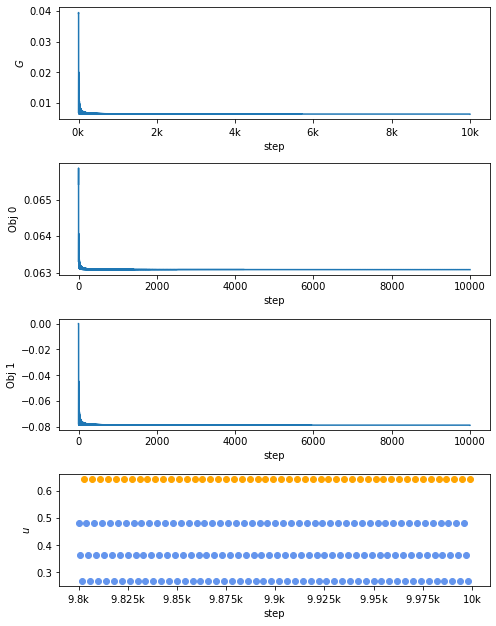

array([ 0.00645614,  0.06308487, -0.07848696])

In [12]:
train.evaluate_current_policy(deterministic=True, steps=10000,
                              actions_to_plot=200, gamma=0.9999)

## Evaluate the current policy

## Save the state

In [9]:
train.save_full_state()


## Load the state

In [2]:
import plotting
reload(plotting);

state_dir = "../important_data/7_pareto_two_qubit_resonant_counterrot/data/pareto/2023_03_23-00_42_58_a=0.75_dt=0.3/"

train = sac_tri.SacTrain()
train.load_train(state_dir,no_train=True)


Number of parameters: 	 pi: 72713, 	 q1: 71427, 	 q2: 71427



### Continue training

In [6]:
train.train(50)

## view training status

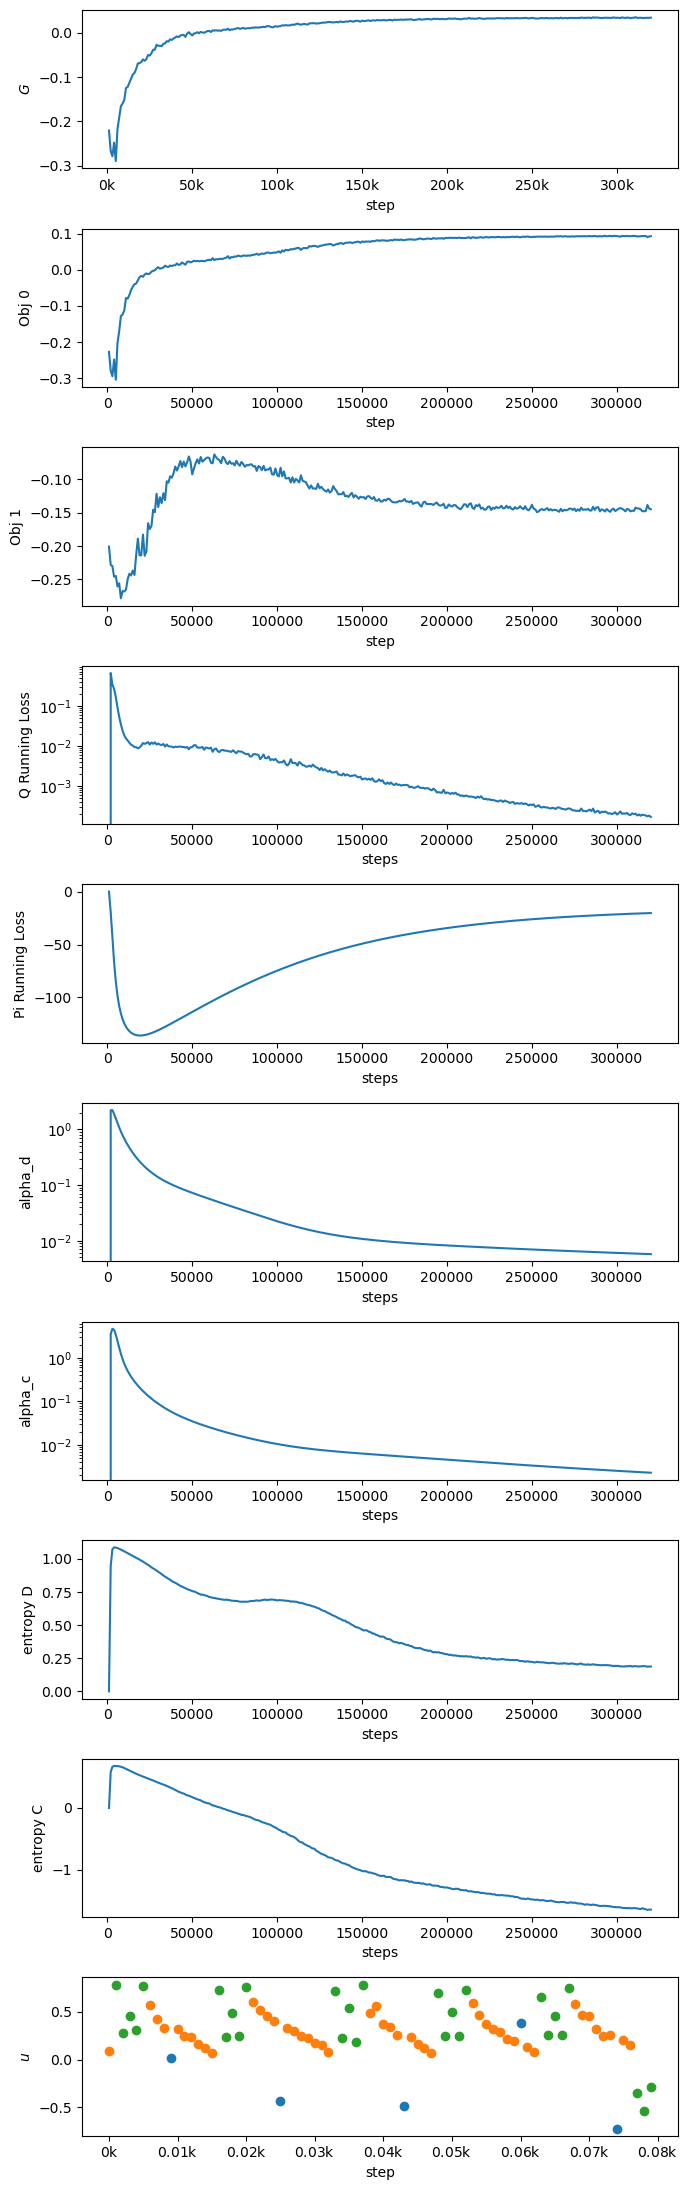

In [3]:
train.plot_logs()